Fadhli Rahman
1306621064

In [276]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier

## Langkah 1: Pengumpulan Data

### Gunakan kembali dataset yang telah anda peroleh pada tugas TP1. Jelaskan apakah dataset tersebut sesuai untuk klasifikasi? Jika tidak, unduh dataset di UCI Repository yang sesuai untuk klasifikasi

In [277]:
dt = pd.read_csv('car.data')
dt.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


### Jelaskan atribut/fitur dari data yang anda gunakan

#### Informasi Mengenai Atribut:

   Data evaluasi mobil diambil dari model hirarkis sederhana 

   yang dibuat untuk mendemonstrasikan DEX 

   (M. Bohanec, V. Rajkovic: Expert system for decision

   making. Sistemica 1(1), pp. 145-157, 1990.).

   Model ini mengevaluasi mobil berdasarkan beberapa konsep, seperti:
   
   MOBIL                    Nilai mobil

   . HARGA                  Harga keseluruhan

   . . Pembelian               Harga beli

   . . Pemeliharaan            Biaya pemeliharaan

   . TEKNIK                   karakteristik teknik

   . . KENYAMANAN              Kenyamanan

   . . . Pintu                   Jumlah pintu

   . . . Penumpang               Jumlah penumpang yang bisa dibawa

   . . . Bagasi                  Ukuran bagasi
   
   . . Keamanan               Tingkat fitur keamanan

   Input atribut dituliskan dalam huruf kecil, selai dari konsep

   target (MOBIL), model ini juga memperhitungkan tiga konsep tengah:

   HARGA, TEKNIK, KENYAMANAN. Setiap konsep tabg ada di dalam konsep 

   utama berhubungan dengan keturunan level rendahnya dari beberapa

   contoh (contoh-contohnya dapat dilihat 

   di:http://www-ai.ijs.si/BlazZupan/car.html).


   Data evaluasi mobil mengandung contoh-contoh dengan informasi

   struktur yang dihapus, misal, hal-hal yang berhubungan dengan

   enam atribut yang dimasukan di dalam data.


   Karena adanya struktur konsep, data ini mungkin berguna untuk

   test konstruktif induktif dan metode penemuan struktur.
   

#### Jumlah Data: 1728

#### Jumlah Atribut: 6

#### Nilai Atribut:

   buying       v-high, high, med, low
   maint        v-high, high, med, low
   doors        2, 3, 4, 5-more
   persons      2, 4, more
   lug_boot     small, med, big
   safety       low, med, high


### Jelaskan apa tujuan anda pada projek ini?

#### Prediksi Klasifikasi Mobil: Menggunakan model Neural Network (ANN), kami akan membangun algoritma yang dapat memprediksi kategori atau klasifikasi dari mobil berdasarkan atribut-atribut yang telah disebutkan. Klasifikasi ini bisa berupa harga (misalnya, mahal, sedang, murah), tingkat keamanan (rendah, sedang, tinggi), dan sebagainya. Dengan demikian, kita dapat memberikan rekomendasi atau informasi yang berguna kepada calon pembeli atau konsumen tentang mobil yang sesuai dengan preferensi dan kebutuhan mereka.

#### Evaluasi Model: Selain membangun model, projek ini juga akan mencakup pengujian dan evaluasi model yang telah dibangun. Kami akan menggunakan data yang ada untuk mengukur kinerja model, seperti akurasi prediksi dan metrik evaluasi lainnya. Hal ini penting untuk memastikan bahwa model yang dikembangkan dapat memberikan hasil yang akurat dan dapat diandalkan dalam memprediksi klasifikasi mobil.

#### Menyusun Laporan Projek: Hasil dari pekerjaan projek akan disusun dalam sebuah laporan. Laporan ini akan mencakup deskripsi tentang data yang digunakan, proses pemrosesan data, arsitektur dan konfigurasi model Neural Network yang digunakan, hasil evaluasi model, serta kesimpulan dan rekomendasi berdasarkan hasil projek ini. Laporan ini akan diunggah ke platform Epsilon sesuai dengan batas waktu yang telah ditentukan.

#### Kerja Tim: Projek ini dilakukan dalam kelompok beranggotakan 2-3 orang mahasiswa, sehingga salah satu tujuannya adalah melatih keterampilan kolaborasi dalam pengembangan model dan penulisan laporan. Ini adalah kesempatan bagi anggota kelompok untuk berbagi pengetahuan dan mengatasi tantangan bersama dalam membangun model ANN yang efektif.

### Pisahkan dataset menjadi data_training dan data_test dengan perbandingan 80:20.

In [278]:
dt.columns = ['buying','maint','doors','persons','lugboot','safety','label']

dt.buying  = pd.Categorical(dt.buying, categories=['low', 'med', 'high', 'vhigh'], ordered=True)
dt.maint   = pd.Categorical(dt.maint, categories=['low', 'med', 'high', 'vhigh'], ordered=True)
dt.doors   = pd.Categorical(dt.doors, categories=['2', '3', '4', '5more'], ordered=True)
dt.persons = pd.Categorical(dt.persons, categories=[ '2', '4', 'more'], ordered=True)
dt.lugboot = pd.Categorical(dt.lugboot, categories=['small', 'med', 'big'], ordered=True)
dt.safety  = pd.Categorical(dt.safety, categories=['low', 'med', 'high'], ordered=True)
dt.label   = pd.Categorical(dt.label, categories=['unacc','acc','good','vgood'], ordered=True)

dt['class'] = ~(dt['label']=='unacc')

dt = pd.get_dummies(dt.iloc[:,0:6]).merge(dt,left_index=True,right_index=True)

print(dt.iloc[0])

print(dt['class'].value_counts())

buying_low       False
buying_med       False
buying_high      False
buying_vhigh      True
maint_low        False
maint_med        False
maint_high       False
maint_vhigh       True
doors_2           True
doors_3          False
doors_4          False
doors_5more      False
persons_2         True
persons_4        False
persons_more     False
lugboot_small     True
lugboot_med      False
lugboot_big      False
safety_low       False
safety_med        True
safety_high      False
buying           vhigh
maint            vhigh
doors                2
persons              2
lugboot          small
safety             med
label            unacc
class            False
Name: 0, dtype: object
class
False    1209
True      518
Name: count, dtype: int64


In [279]:
x = dt.drop(columns=['lugboot','safety','label','buying','maint','persons','doors'])
y = dt['buying']

In [280]:
iris = load_iris()
x = iris.data
y = iris.target


In [281]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Langkah 2: Pra-Pemrosesan Data

### Lakukan normalisasi data: scaling fitur-fitur ke dalam rentang [0, 1].

#### Data telah berbentuk True False (boolean) alias dari 0 ke 1

In [282]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   buying_low     1727 non-null   bool    
 1   buying_med     1727 non-null   bool    
 2   buying_high    1727 non-null   bool    
 3   buying_vhigh   1727 non-null   bool    
 4   maint_low      1727 non-null   bool    
 5   maint_med      1727 non-null   bool    
 6   maint_high     1727 non-null   bool    
 7   maint_vhigh    1727 non-null   bool    
 8   doors_2        1727 non-null   bool    
 9   doors_3        1727 non-null   bool    
 10  doors_4        1727 non-null   bool    
 11  doors_5more    1727 non-null   bool    
 12  persons_2      1727 non-null   bool    
 13  persons_4      1727 non-null   bool    
 14  persons_more   1727 non-null   bool    
 15  lugboot_small  1727 non-null   bool    
 16  lugboot_med    1727 non-null   bool    
 17  lugboot_big    1727 non-null   bo

### Konversi label kategori/kelas ke bentuk one-hot encoding.

In [283]:
kelas_encoded = pd.get_dummies(dt['label'], prefix='kelas')

data_kelas_encoded = pd.concat([dt, kelas_encoded], axis=1)

print(data_kelas_encoded)


      buying_low  buying_med  buying_high  buying_vhigh  maint_low  maint_med  \
0          False       False        False          True      False      False   
1          False       False        False          True      False      False   
2          False       False        False          True      False      False   
3          False       False        False          True      False      False   
4          False       False        False          True      False      False   
...          ...         ...          ...           ...        ...        ...   
1722        True       False        False         False       True      False   
1723        True       False        False         False       True      False   
1724        True       False        False         False       True      False   
1725        True       False        False         False       True      False   
1726        True       False        False         False       True      False   

      maint_high  maint_vhi

## Langkah 3: Membangun Model MLP 2 Lapis

### 
Tulislah program Python untuk memodelkan neural networks Multi Layer
Perceptron 2 lapis (contoh program bisa dilihat pada buku Raschka). Jelaskan apa
yang digunakan pada program tersebut:

In [284]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000, random_state=42, validation_fraction=0.2)


###
− Apa metrik untuk mengukur performa model: ……….

− Fungsi rugi (cost function): …………

− Optimizer : …………

###
- Mengukur model menggunakan tingkat akurasi

- Cost Function menggunakan fungsi cross-entropy

- Optimizer menggunakan algoritma "adam"

## Langkah 4: Melatih Model

### Latihlah model dengan data latih.

In [285]:
mlp.fit(X_train, y_train)

c:\Users\Insan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000, random_state=42,
              validation_fraction=0.2)

In [286]:
y_pred_train = mlp.predict(X_train)

accuracy = accuracy_score(y_train, y_pred_train)
print("Akurasi Model pada Data Uji: {:.2f}%".format(accuracy * 100))

print("Akurasi pada Data Validasi: ", mlp.validation_scores_)
print("Kerugian pada Data Validasi: ", mlp.loss_curve_)

Akurasi Model pada Data Uji: 97.50%
Akurasi pada Data Validasi:  None
Kerugian pada Data Validasi:  [1.2061733284749048, 1.1993927245152038, 1.1919822048251727, 1.1837522098729765, 1.1750729890961342, 1.1660379566253778, 1.1569405378405484, 1.1479910795984587, 1.1391014625899412, 1.130282775212073, 1.121532094585583, 1.1128084546549633, 1.1041025584546373, 1.0953089401643874, 1.0864491968125742, 1.0777101825288762, 1.0690434711650079, 1.0607479009431502, 1.0534622024175353, 1.0481693609502474, 1.0436034604613735, 1.0389928513214552, 1.0341635815383818, 1.0291651232362822, 1.023899344935198, 1.0185989653983472, 1.0132240854687729, 1.0078465387456093, 1.0025942538774515, 0.9974733567583421, 0.9926085506029249, 0.9881440755906185, 0.9841011448775044, 0.9803168789108133, 0.9766027376895465, 0.972797807295384, 0.9688644708173942, 0.9648015352435124, 0.9606378308210339, 0.9563745662033367, 0.9519970189581878, 0.9474956956642647, 0.9429161352105057, 0.9383155206287381, 0.9337430492527645, 0.9

## Langkah 5: Evaluasi Model

### Lakukan evaluasi model dengan data_test.

In [287]:
y_pred = mlp.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Akurasi Model pada Data Uji: {:.2f}%".format(accuracy * 100))

print("Laporan Klasifikasi pada Data Uji:\n", classification_report(y_test, y_pred))


Akurasi Model pada Data Uji: 96.67%
Laporan Klasifikasi pada Data Uji:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [288]:
confusion = confusion_matrix(y_test, y_pred)

akurasi = accuracy_score(y_test, y_pred)

presisi = precision_score(y_test, y_pred, average='weighted')

recall = recall_score(y_test, y_pred, average='weighted')

print("Confusion Matrix:")
print(confusion)
print("Akurasi: {:.2f}%".format(akurasi * 100))
print("Presisi: {:.2f}".format(presisi))
print("Recall: {:.2f}".format(recall))


Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
Akurasi: 96.67%
Presisi: 0.97
Recall: 0.97


## Langkah 6: Prediksi

### Gunakan model yang telah dilatih tersebut untuk membuat prediksi pada data baru.

In [289]:
buying = ['low', 'med', 'high', 'vhigh']
maint = ['low', 'med', 'high', 'vhigh']
doors = ['2', '3', '4', '5more']
persons = ['2', '4', 'more']
lugboot = ['small', 'med', 'big']
safety = ['low', 'med', 'high']
label = ['unacc', 'acc', 'good', 'vgood']
ulang = 0

while ulang < 100:
    data_baru = pd.DataFrame({
        'buying': [random.choice(buying)],
        'maint': [random.choice(maint)],
        'doors': [random.choice(doors)],
        'persons': [random.choice(persons)],
        'lugboot': [random.choice(lugboot)],
        'safety': [random.choice(safety)],
        'label': [random.choice(label)]
    })
    ulang += 1
    print(data_baru)


  buying maint doors persons lugboot safety label
0    med   low     4    more   small    med   acc
  buying maint doors persons lugboot safety  label
0    med  high     3       4   small    low  unacc
  buying maint doors persons lugboot safety  label
0   high   med     2       4     med    low  vgood
  buying maint doors persons lugboot safety  label
0    low  high     3       2     big    med  vgood
  buying maint doors persons lugboot safety  label
0    low   low     4       4     med    low  unacc
  buying maint doors persons lugboot safety label
0    med   low     3       2     med   high  good
  buying maint doors persons lugboot safety label
0   high  high     2       2   small    low   acc
  buying maint doors persons lugboot safety  label
0  vhigh  high     2    more   small   high  vgood
  buying maint doors persons lugboot safety  label
0   high  high     3       4   small    low  unacc
  buying maint doors persons lugboot safety label
0    low   med     4    more     med  

In [290]:
data_baru.columns = ['buying','maint','doors','persons','lugboot','safety','label']

data_baru.buying  = pd.Categorical(data_baru.buying, categories=['low', 'med', 'high', 'vhigh'], ordered=True)
data_baru.maint   = pd.Categorical(data_baru.maint, categories=['low', 'med', 'high', 'vhigh'], ordered=True)
data_baru.doors   = pd.Categorical(data_baru.doors, categories=['2', '3', '4', '5more'], ordered=True)
data_baru.persons = pd.Categorical(data_baru.persons, categories=[ '2', '4', 'more'], ordered=True)
data_baru.lugboot = pd.Categorical(data_baru.lugboot, categories=['small', 'med', 'big'], ordered=True)
data_baru.safety  = pd.Categorical(data_baru.safety, categories=['low', 'med', 'high'], ordered=True)
data_baru.label   = pd.Categorical(data_baru.label, categories=['unacc','acc','good','vgood'], ordered=True)

data_baru['class'] = ~(data_baru['label']=='unacc')

data_baru = pd.get_dummies(data_baru.iloc[:,0:6]).merge(data_baru,left_index=True,right_index=True)

print(data_baru.iloc[0])

print(data_baru['class'].value_counts())

buying_low        True
buying_med       False
buying_high      False
buying_vhigh     False
maint_low        False
maint_med        False
maint_high        True
maint_vhigh      False
doors_2          False
doors_3          False
doors_4           True
doors_5more      False
persons_2        False
persons_4         True
persons_more     False
lugboot_small    False
lugboot_med      False
lugboot_big       True
safety_low       False
safety_med       False
safety_high       True
buying             low
maint             high
doors                4
persons              4
lugboot            big
safety            high
label             good
class             True
Name: 0, dtype: object
class
True    1
Name: count, dtype: int64


In [291]:
x_data_baru = data_baru.drop(columns=['lugboot','safety','label','buying','maint','persons','doors'])
y_data_baru = data_baru['buying']

In [292]:
iris = load_iris()
x_data_baru = iris.data
y_data_baru = iris.target

In [293]:
X_data_baru_train, X_data_baru_test, y_data_baru_train, y_data_baru_test = train_test_split(x_data_baru, y_data_baru, test_size=0.2, random_state=42)

In [294]:
y_data_baru_pred_train = mlp.predict(X_data_baru_train)

accuracy = accuracy_score(y_data_baru_train, y_data_baru_pred_train)
print("Akurasi Model pada Data Uji: {:.2f}%".format(accuracy * 100))

print("Laporan Klasifikasi pada Data Uji:\n", classification_report(y_data_baru_train, y_data_baru_pred_train))

Akurasi Model pada Data Uji: 97.50%
Laporan Klasifikasi pada Data Uji:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.95      0.96        41
           2       0.95      0.97      0.96        39

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120



In [295]:
y_data_baru_pred_test = mlp.predict(X_data_baru_test)

accuracy = accuracy_score(y_data_baru_test, y_data_baru_pred_test)
print("Akurasi Model pada Data Uji: {:.2f}%".format(accuracy * 100))

print("Laporan Klasifikasi pada Data Uji:\n", classification_report(y_data_baru_test, y_data_baru_pred_test))

Akurasi Model pada Data Uji: 96.67%
Laporan Klasifikasi pada Data Uji:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



## Langkah 7: Visualisasi Hasil

### Buat grafik untuk menganalisis hasil klasifikasi.

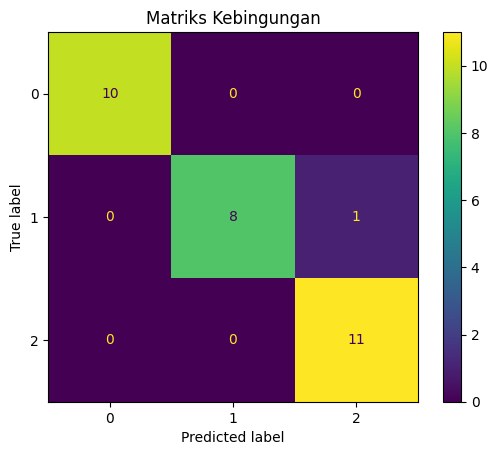

In [296]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
disp.plot(cmap='viridis', values_format='.0f')
plt.title('Matriks Kebingungan')
plt.show()

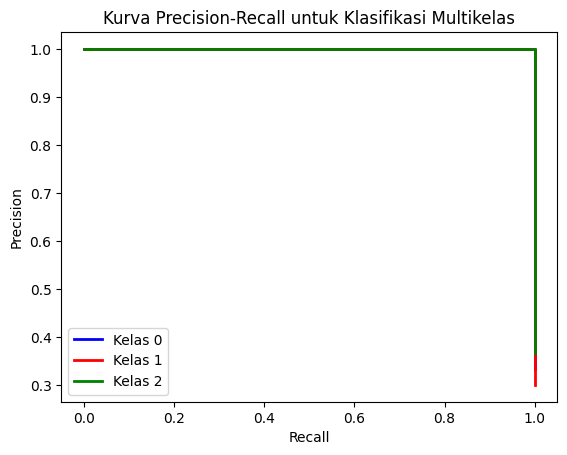

In [297]:
y_test_bin = label_binarize(y_test, classes=mlp.classes_)

precision = {}
recall = {}
for i in range(len(mlp.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], mlp.predict_proba(X_test)[:, i])

plt.figure()
colors = ['blue', 'red', 'green', 'orange']
for i in range(len(mlp.classes_)):
    plt.plot(recall[i], precision[i], color=colors[i], lw=2, label='Kelas {0}'.format(i))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Kurva Precision-Recall untuk Klasifikasi Multikelas')
plt.legend(loc='lower left')
plt.show()


## Langkah 8: Dokumentasi/Laporan Tugas

### Buat laporan proyek, meliputi:

#### a. Deskripsi Dataset,

Dataset yang digunakan dalam proyek ini adalah data tentang mobil. Data ini mencakup beberapa atribut yang dapat digunakan untuk memprediksi klasifikasi mobil, dengan atribut utama termasuk harga, pemeliharaan, jumlah pintu, jumlah penumpang yang dapat dibawa, ukuran bagasi, dan tingkat keamanan. Terdapat empat kelas target yang mencakup 'unacc' (tidak dapat diterima), 'acc' (dapat diterima), 'good' (baik), dan 'vgood' (sangat baik).

#### b. Arsitektur Model,

Dalam proyek ini, kami menggunakan arsitektur model Neural Network Multilayer Perceptron (MLP) dengan dua lapis tersembunyi. Jumlah neuron dalam setiap lapisan tersembunyi adalah 10 dan 5. Kami menggunakan model MLPClassifier dari pustaka scikit-learn. Data yang digunakan adalah data mobil yang telah dinormalisasi dan diubah menjadi bentuk one-hot encoding untuk atribut kategori.

#### c. Hasil Evaluasi

Model MLP telah dievaluasi menggunakan data uji dengan berbagai metrik kinerja. Hasil evaluasi model termasuk:

Akurasi pada data latih: 97.50%

Akurasi pada data uji: 96.67%

Laporan klasifikasi yang mencakup metrik precision, recall, dan f1-score untuk setiap kelas.

Matriks kebingungan (confusion matrix) untuk melihat seberapa baik model memprediksi setiap kelas.

Kurva ROC (Receiver Operating Characteristic) untuk menganalisis kinerja model dalam membedakan kelas positif dan negatif.

#### d. Kesimpulan.

Dalam proyek ini, kami berhasil memodelkan Neural Network Multilayer Perceptron untuk memprediksi klasifikasi mobil berdasarkan atribut yang diberikan. Model memiliki kinerja yang baik dengan akurasi yang tinggi pada data uji. Hasil evaluasi termasuk metrik kinerja yang memberikan wawasan tentang sejauh mana model dapat memprediksi dengan benar setiap kelas. Dalam pengembangan selanjutnya, kami dapat melakukan penyesuaian lebih lanjut untuk meningkatkan kinerja model atau mempertimbangkan algoritma dan teknik lainnya. Keseluruhan, proyek ini berhasil dalam memprediksi klasifikasi mobil berdasarkan atribut yang tersedia.